<a href="https://colab.research.google.com/github/oldcartom/csApp/blob/main/MagWi_Corridor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install xgboost==1.5.0

     |████████████████████████████████| 173.5 MB 62 kB/s 
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers

import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import xgboost as xgb
from sklearn.multioutput import MultiOutputRegressor, MultiOutputClassifier
from sklearn import svm

import matplotlib.pyplot as plt
import csv
import random

from math import radians, cos, sin, asin, sqrt
from scipy.stats import sem

import os
import glob
import sys

from collections import defaultdict

import json

from itertools import product
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.metrics import classification_report

from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras import layers
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

In [ ]:
main_path='/content/drive/MyDrive/Research_Catholic_rajiv/Magnetic Indoor/Mag-Wi/Magnetic field dataset/Static Data/'
building_names = os.listdir(main_path)

In [ ]:
# '''  
# DATA ORGANISATION BUILDING NAME + META DATA
# SAVED PATH FOLDER =  '/content/drive/MyDrive/Research_Catholic_rajiv/Magnetic Indoor/Mag-Wi/Magnetic_static_processed'+ '/'+ b +'.csv
# # BE Building 54464
# # CS Engineering 34276
# # Electrical Engineering 33574
# # IACT 36981
# # IT Engineering 279303
# '''
# for b in building_names:
#   shpfiles = []
#   path='/content/drive/MyDrive/Research_Catholic_rajiv/Magnetic Indoor/Mag-Wi/Magnetic field dataset/Static Data/'+b
#   for dirpath, subdirs, files in os.walk(path):
#       for x in files:
#           if x.endswith(".csv"):
#               shpfiles.append(os.path.join(dirpath, x))
#   li = []
#   for i in shpfiles:
#     meta_data = '/'.join(i.split(path)[1].split('/')[1:-1])
#     try:
#       df = pd.read_csv(i, index_col=None, header=0)
#       try:
#         df=df.drop(columns=['Unnamed: 16'])
#       except:
#         pass
#     except:
#       continue
#     df['building_name'] = b
#     df['meta_data'] = meta_data
#     li.append(df)
#   if li:    
#     df=pd.concat(li, axis=0, ignore_index=True)

#     path_save='/content/drive/MyDrive/Research_Catholic_rajiv/Magnetic Indoor/Mag-Wi/Magnetic_static_processed'+ \
#                 '/'+ b +'.csv'
      
#     df.to_csv(path_save,index=False)
#     print(b,df.shape[0])

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
saved_path_folder =  '/content/drive/MyDrive/Research_Catholic_rajiv/Magnetic Indoor/Mag-Wi/Magnetic_static_processed'

# saved_path_folder  = 'D:/Research/Magnetic Indoor/Mag-Wi/Magnetic_static_processed' 

In [ ]:
csv_files = glob.glob(os.path.join(saved_path_folder, "*.csv"))

In [ ]:
for files in csv_files:
  df=pd.read_csv(files)
  print(df['meta_data'].unique(), df['building_name'].unique())

['Navigation/Scenario 1/S9+/User 2' 'Navigation/Scenario 1/A8/User 2'
 'Navigation/Scenario 1/G7/User 2' 'Navigation/Scenario 1/S8/User 2'] ['BE Building']
['Navigation/A8/User 2' 'Navigation/G7/User 2' 'Navigation/S8/User 2'
 'Navigation/S9+/User 2'] ['CS Engineering']
['Navigation/Scenario 2/S8/User 2' 'Navigation/Scenario 2/A8/User 2'
 'Navigation/Scenario 2/G7/User 2' 'Navigation/Scenario 2/S9+/User 2'
 'Navigation/Scenario 1/S8/User 2'] ['Electrical Engineering']
['Navigation/Scenario 2/A8/User 2' 'Navigation/Scenario 2/S8/User 2'
 'Navigation/Scenario 2/G7/User 2' 'Navigation/Scenario 2/S9+/User 2'
 'Navigation/Scenario 1/LG G6/User 2' 'Navigation/Scenario 1/S8/User 2'] ['IACT']
['Swinging/Scenario-1/S8/User 2' 'Navigation/Scenario-1/G7/User 2'
 'Navigation/Scenario-1/S8/User 1' 'Navigation/Scenario-1/S8/User 2'
 'Navigation/Scenario-1/S8/User 3' 'Navigation/Scenario-1/A8/User 2'
 'Navigation/Scenario-1/A8/User 1' 'Navigation/Scenario-1/A8/User 3'
 'Navigation/Scenario-1/S9+/User

In [ ]:
Scenarios = [['Navigation/Scenario 1'], ['Navigation'], 
['Navigation/Scenario 1', 'Navigation/Scenario 2'], 
['Navigation/Scenario 1', 'Navigation/Scenario 2'], 
['Navigation/Scenario-1', 'Navigation/Scenario-2', 'Navigation/Scenario-3']]

In [ ]:
df[df['X-cord']==1.0]

,Time,X-cord,Y-cord,Mag_x,Mag_y,Mag_z,Acc_x,Acc_y,Acc_z,Gyro_x,Gyro_y,Gyro_z,Orn_x,Orn_y,Orn_z,Pressure,building_name,meta_data
0,2021.01.30 16:38:38,1.0,27.0,-37.800000,-5.16,-36.420000,5.660066,-7.249864,1.601770,0.033189,0.080682,-0.003790,0.889159,-1.295013,-2.578364,1016.73900,IT Engineering,Swinging/Scenario-1/S8/User 2
1,2021.01.30 16:38:38,1.0,27.0,-37.920000,-4.68,-37.380000,6.265817,-7.273807,2.370332,-0.055997,-0.107465,-0.099696,0.826500,-1.209139,-2.636745,1016.73900,IT Engineering,Swinging/Scenario-1/S8/User 2
2,2021.01.30 16:38:38,1.0,27.0,-37.559998,-4.80,-38.219997,6.182017,-7.280990,2.449343,-0.094482,-0.084863,-0.112524,0.830694,-1.193566,-2.638389,1016.73900,IT Engineering,Swinging/Scenario-1/S8/User 2
3,2021.01.30 16:38:38,1.0,27.0,-36.719997,-5.64,-38.820000,6.399897,-7.139728,1.987248,0.111380,0.003102,-0.089312,0.817061,-1.269723,-2.536059,1016.73730,IT Engineering,Swinging/Scenario-1/S8/User 2
4,2021.01.30 16:38:38,1.0,27.0,-35.640000,-6.96,-39.540000,6.447782,-7.106208,1.896266,0.121154,0.006156,-0.050216,0.813261,-1.284765,-2.505239,1016.73560,IT Engineering,Swinging/Scenario-1/S8/User 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204733,2021.01.30 15:49:44,1.0,24.0,19.380000,-37.14,-34.140000,-5.707951,8.102226,-0.177176,-0.002467,-0.002594,-0.007016,-0.956835,1.601827,1.753876,1016.21533,IT Engineering,Call listening/Scenario-1/S8/User 2
204734,2021.01.30 15:49:44,1.0,24.0,19.380000,-37.62,-34.020000,-5.626546,8.109408,-0.131685,0.015248,-0.012979,0.008867,-0.964095,1.594196,1.748407,1016.21730,IT Engineering,Call listening/Scenario-1/S8/User 2
204735,2021.01.30 15:49:44,1.0,24.0,19.080000,-37.20,-34.140000,-5.830059,8.126168,-0.114925,-0.011630,-0.016033,-0.000907,-0.948368,1.590506,1.763561,1016.21606,IT Engineering,Call listening/Scenario-1/S8/User 2
204736,2021.01.30 15:49:44,1.0,24.0,18.660000,-36.96,-33.480000,-5.791751,8.095043,-0.679974,-0.000634,-0.033138,-0.012514,-0.946521,1.687665,1.838933,1016.21606,IT Engineering,Call listening/Scenario-1/S8/User 2


In [ ]:
def find_traverse_path(data_frame):
  td=df.sort_values(by=['Y-cord','X-cord'])[['X-cord','Y-cord']]
  td_new =td[['X-cord','Y-cord']].drop_duplicates()
  # td_new = td_new.sort_values(by=['X-cord','Y-cord'])
  idx={}

  for i in range(td_new.shape[0]):
    dist_array=[]
    for j in range(td_new.shape[0]):
      dist = (td_new.iloc[i]['X-cord']-td_new.iloc[j]['X-cord'])**2+(td_new.iloc[i]['Y-cord']-td_new.iloc[j]['Y-cord'])**2
      dist_array.append(dist)
    a=np.array(dist_array)
    indices = np.nonzero(a)[0]
    closest_points = np.where(a==np.min(a[indices]))[0]
    idx[i]=closest_points
  ik=idx
  fpix = min(idx, key=lambda z: len(idx[z]))
  cp=fpix
  traverses = np.array([])
  traverses = np.append(traverses, cp)
  for i in range(0,len(ik)):
    b=traverses[-1]
    traverses = np.append(traverses, int(cp))
    if i<len(ik)-1:
      cp = np.setdiff1d(ik[cp],b)[0]
  traverses=np.delete(traverses,0)

  td_traverse=td_new.iloc[traverses]
  td_traverse.reset_index(inplace=True,drop=True)
  return td_traverse

def corridor_finder(td_traverse):
  # diff, slope
  td_traverse['x-diff']=td_traverse['X-cord'].diff().fillna(0)
  td_traverse['y-diff']=td_traverse['Y-cord'].diff().fillna(0)
  o=0
  slope = 4
  first_change=0
  for index,row in td_traverse.iterrows():
    if row['x-diff'] == 0 and row['y-diff'] == 0:
      o = o
    else:
      if row['y-diff']/row['x-diff'] != slope:
        first_change=first_change+1
        if first_change!=1:
          o=o+1
        else:
          o=o
        slope = row['y-diff']/row['x-diff']
    td_traverse.loc[index,'corridor'] = o
  # plt.figure()
  # plt.scatter(td_traverse['X-cord'],td_traverse['Y-cord'],c=td_traverse['corridor']**2)
  td_corridor = df.set_index(['X-cord','Y-cord']).join(td_traverse.set_index(['X-cord','Y-cord'])) #final dataframe
  td_corridor=td_corridor.reset_index()
  return td_corridor

#Machine learning
def xgboost_trainer_report(td_corridor):
  # X = td_corridor[['Mag_x', 'Mag_y', 'Mag_z', 'Acc_x', 'Acc_y', 'Acc_z', 'Gyro_x', \
  #       'Gyro_y', 'Gyro_z', 'Orn_x', 'Orn_y', 'Orn_z', 'Pressure']]
  X = td_corridor[['Mag_x', 'Mag_y', 'Mag_z']]
  Y = td_corridor[['corridor']]
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.33, random_state=42)
  reg1 = xgb.XGBClassifier(tree_method='gpu_hist')
  reg1.fit(X_train,y_train)
  y_pred = reg1.predict(X_test)
  return classification_report(y_test, y_pred), reg1

def knn(td_corridor):
  X = td_corridor[['Mag_x', 'Mag_y', 'Mag_z', 'Acc_x', 'Acc_y', 'Acc_z', 'Gyro_x', \
       'Gyro_y', 'Gyro_z', 'Orn_x', 'Orn_y', 'Orn_z', 'Pressure']]
 # X = td_corridor[['Mag_x', 'Mag_y', 'Mag_z']]
  Y = td_corridor[['corridor']]
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.33, random_state=42)
  reg1 = KNeighborsClassifier()
  reg1.fit(X_train,y_train)
  y_pred = reg1.predict(X_test)
  return classification_report(y_test, y_pred), reg1

In [ ]:
# plt.figure()
# plt.scatter(np.unique(np.stack([df['X-cord'].values,df['Y-cord'].values],axis=1),axis=0)[:,0],np.unique(np.stack([df['X-cord'].values,df['Y-cord'].values],axis=1),axis=0)[:,1])

# plt.figure()
# plt.scatter(td_corridor['X-cord'],td_corridor['Y-cord'],c=td_corridor['corridor']*4,label=(ele, file_no))
# plt.legend()

In [ ]:
# print(pd.DataFrame.from_dict(result_corridor, orient='index').iloc[0][0])

# 1. Corridor Plots

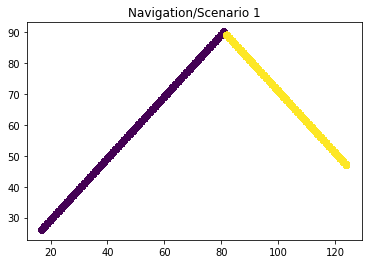

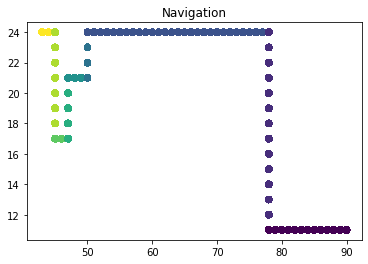

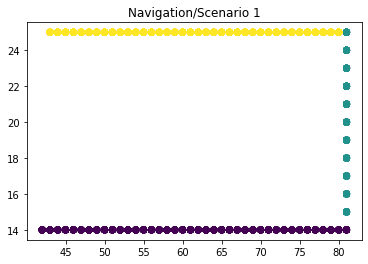

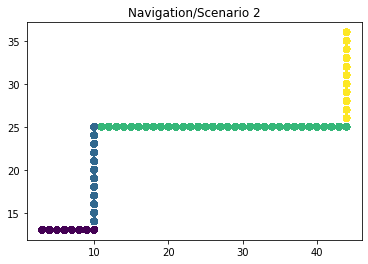

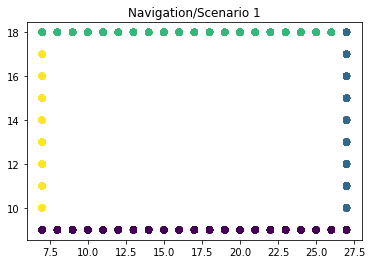

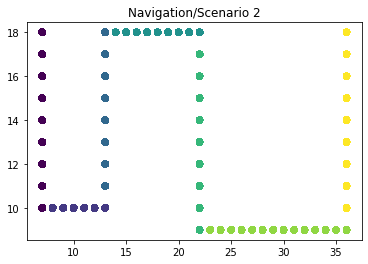

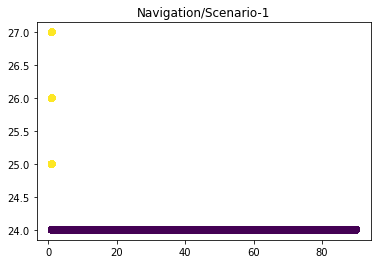

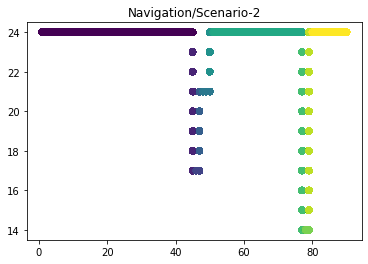

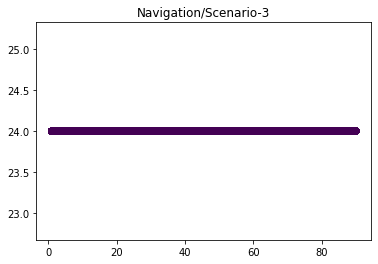

In [ ]:
for file_no in range(0,len(csv_files)):
  df_big=pd.read_csv(csv_files[file_no])
  for _ in Scenarios[file_no]:
    df = df_big[df_big['meta_data'].str.contains(_)]
    td_traverse = find_traverse_path(df)
    td_corridor=corridor_finder(td_traverse)
    plt.figure()
    plt.scatter(td_corridor['X-cord'],td_corridor['Y-cord'],c=td_corridor['corridor']*4)
    plt.title(_)

# 2. Corridor wise classifications

In [ ]:
#corridor wise classifications
result_corridor = {}
for file_no in range(0,len(csv_files)):
  df_big=pd.read_csv(csv_files[file_no])
  s_n=0
  for _ in Scenarios[file_no]:
    s_n=s_n+1
    df = df_big[df_big['meta_data'].str.contains(_)]
    td_traverse = find_traverse_path(df)
    td_corridor=corridor_finder(td_traverse)
    # print(xgboost_trainer_report(td_corridor))
    # print(str(file_no)+'/'+_ )
    ml_output = xgboost_trainer_report(td_corridor)
    result_corridor[str(file_no)+'/'+_ ] = ml_output[0]
    # trained_model = ml_output[1].save_model('xgb_{}_{}.model'.format(file_no,s_n))

[00:45:03] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:45:05] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:45:09] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:45:11] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old

In [ ]:
#corridor wise classifications
result_corridor = {}
for file_no in range(0,len(csv_files)):
  df_big=pd.read_csv(csv_files[file_no])
  s_n=0
  for _ in Scenarios[file_no]:
    s_n=s_n+1
    df = df_big[df_big['meta_data'].str.contains(_)]
    td_traverse = find_traverse_path(df)
    td_corridor=corridor_finder(td_traverse)
    # print(xgboost_trainer_report(td_corridor))
    # print(str(file_no)+'/'+_ )
    ml_output = knn(td_corridor)
    result_corridor[str(file_no)+'/'+_ ] = ml_output[0]
    # trained_model = ml_output[1].save_model('xgb_{}_{}.model'.format(file_no,s_n))

ValueError: ignored

In [ ]:
# t = xgb.XGBClassifier()
# t.load_model('xgb_0_1.model')

# 3. Corridor point wise classifications

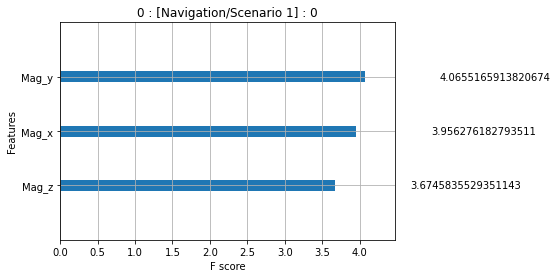

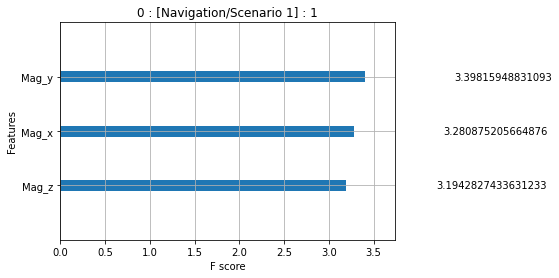

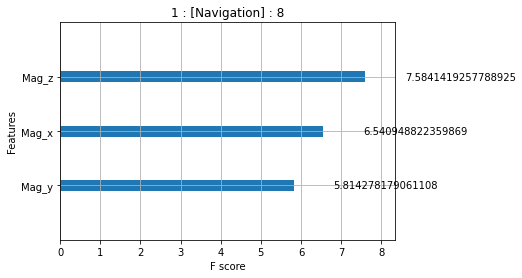

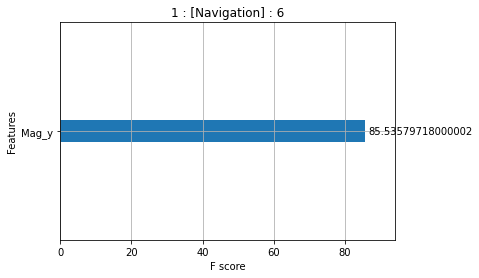

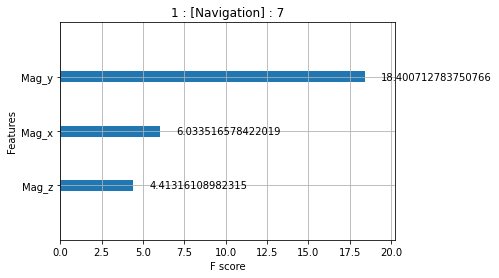

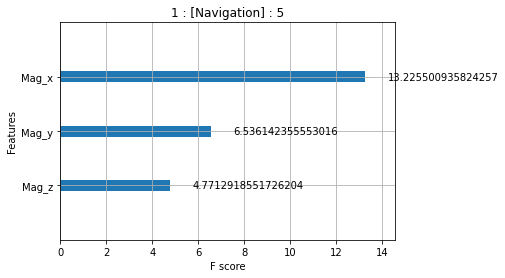

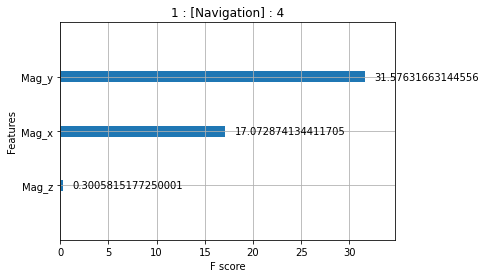

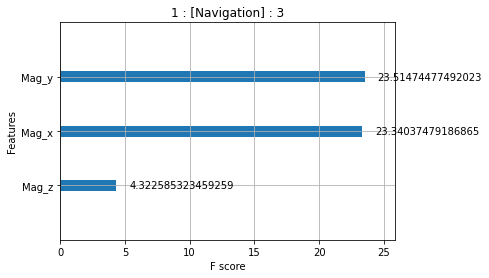

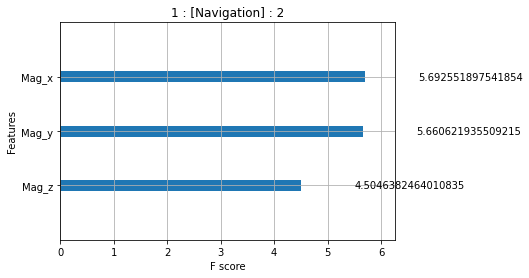

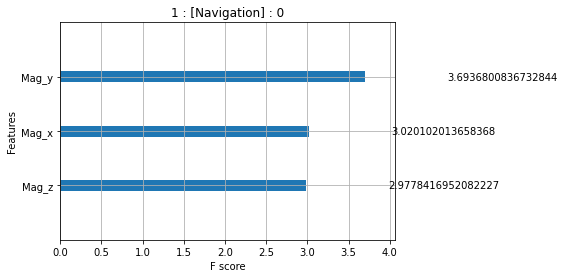

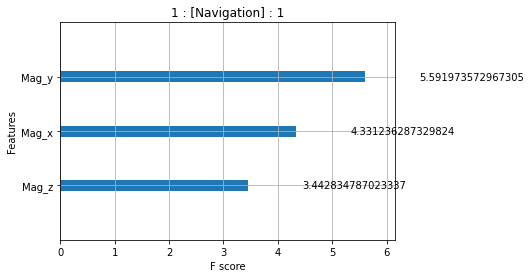

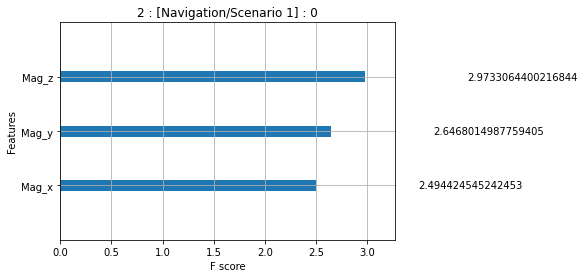

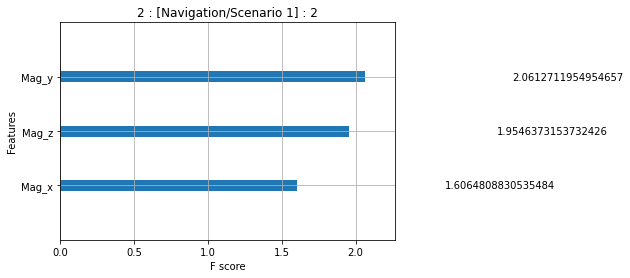

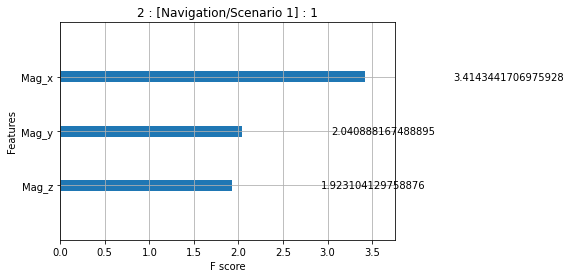

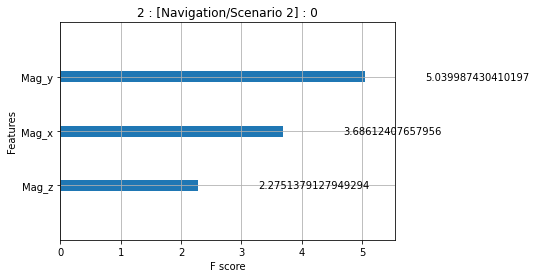

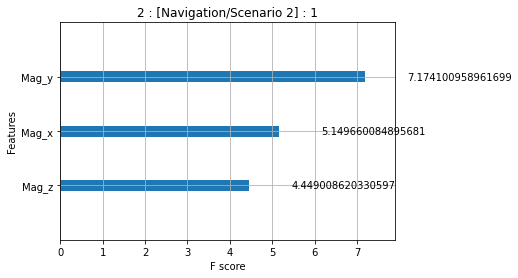

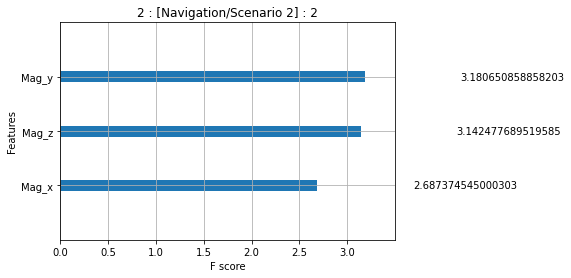

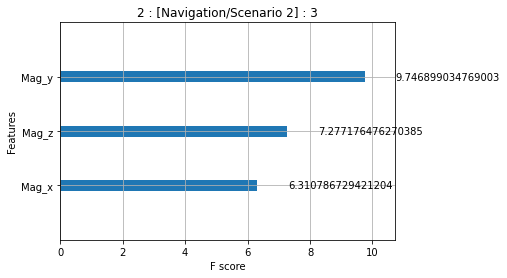

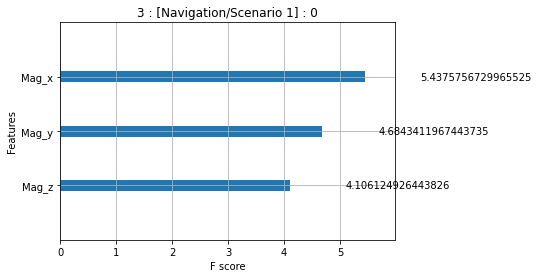

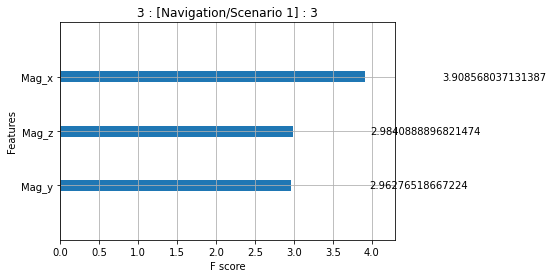

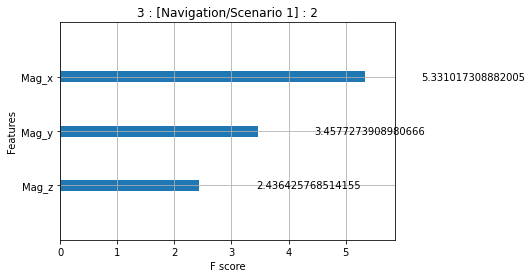

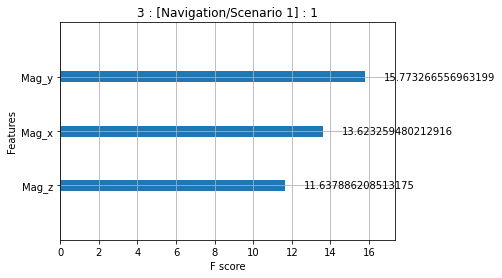

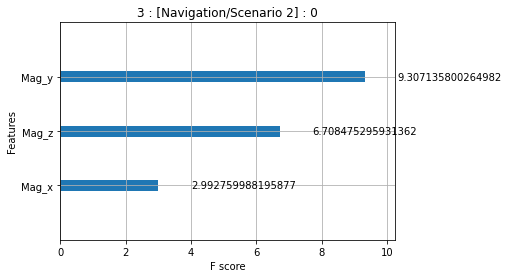

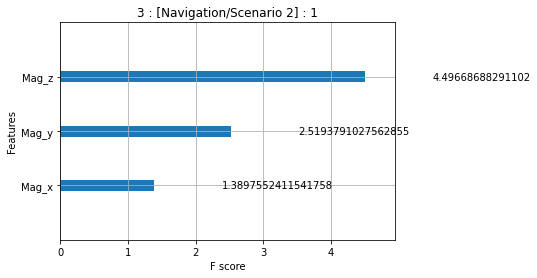

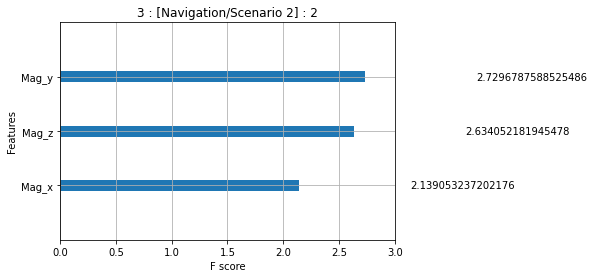

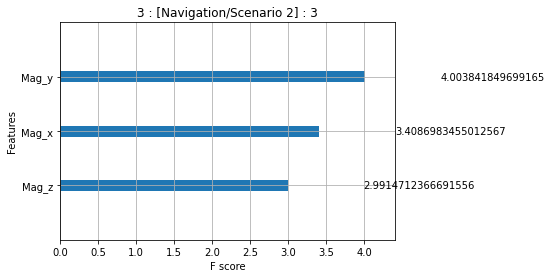

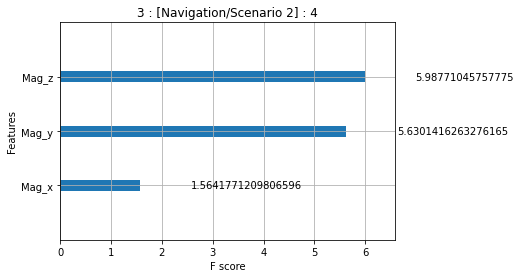

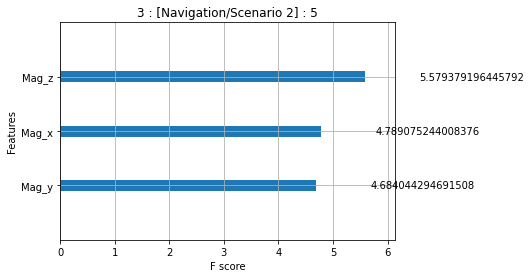

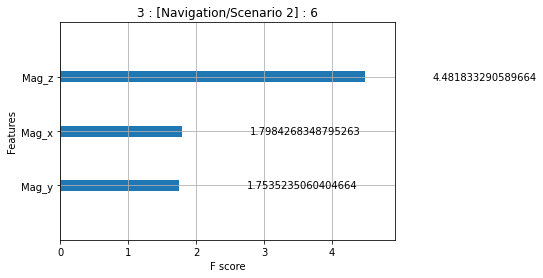

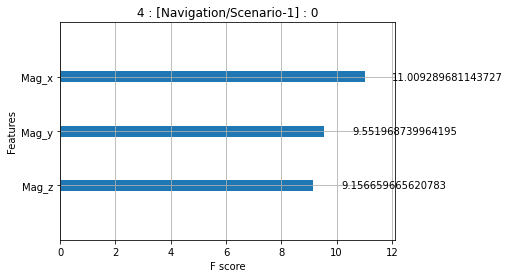

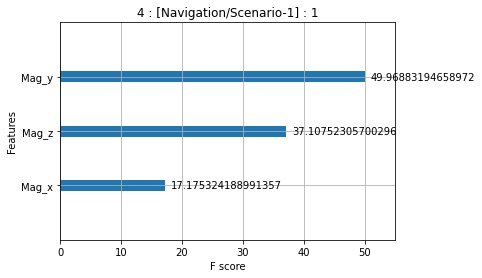

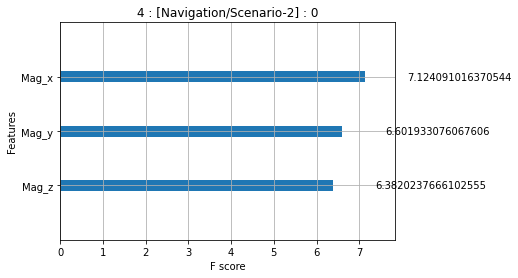

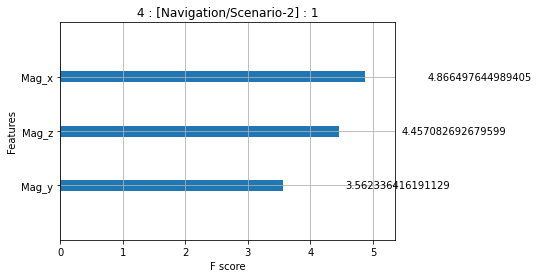

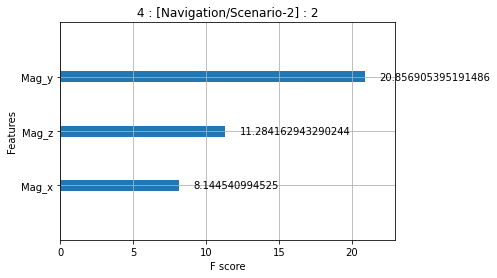

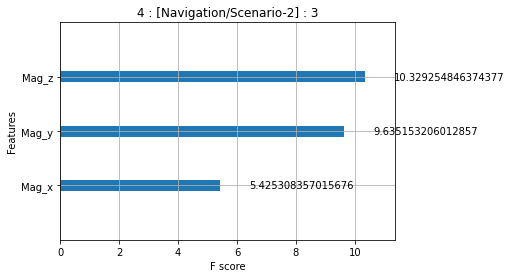

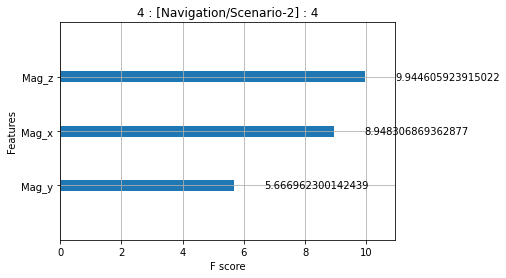

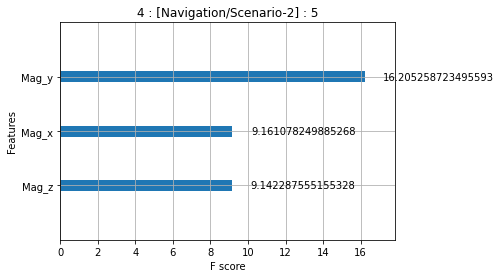

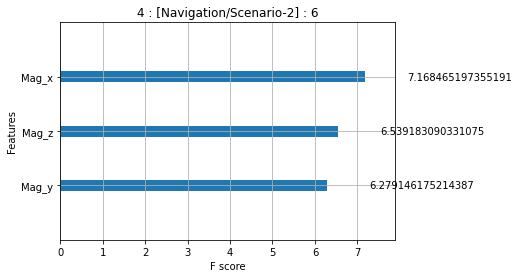

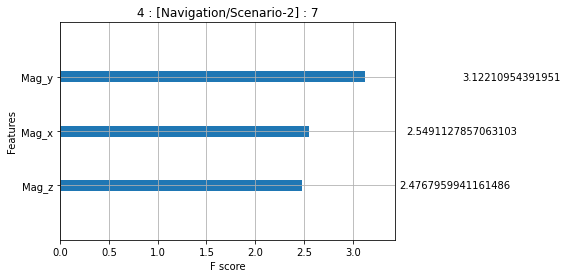

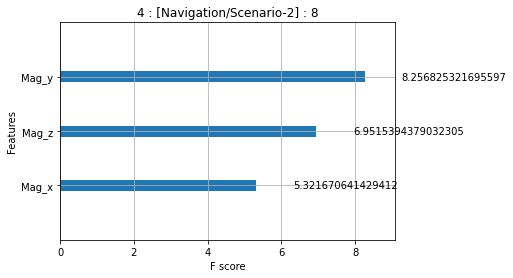

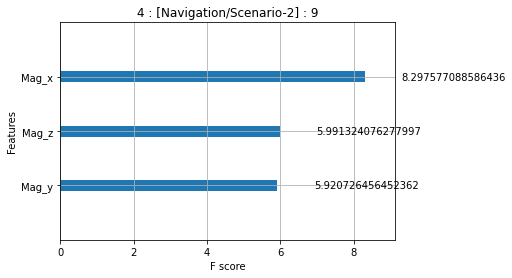

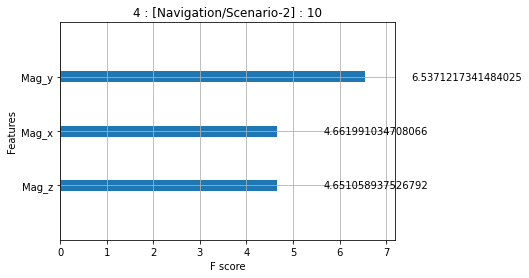

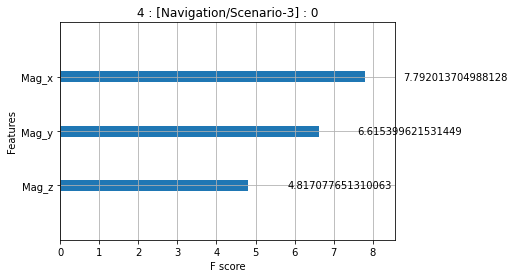

In [ ]:
#within corridor point wise classifications
reults_corridor_deep =[]
for file_no in range(0,len(csv_files)):
  df_big=pd.read_csv(csv_files[file_no])
  for _ in Scenarios[file_no]:
    df = df_big[df_big['meta_data'].str.contains(_)]
    td_traverse = find_traverse_path(df)
    td_corridor=corridor_finder(td_traverse)
    for corridor in td_corridor['corridor'].unique():
      td_corridorx = td_corridor[td_corridor['corridor']==corridor]
      # X = td_corridorx[['Mag_x', 'Mag_y', 'Mag_z', 'Acc_x', 'Acc_y', 'Acc_z', 'Gyro_x', \
      #         'Gyro_y', 'Gyro_z', 'Orn_x', 'Orn_y', 'Orn_z', 'Pressure']]
      X = td_corridorx[['Mag_x', 'Mag_y', 'Mag_z']]
      Y = td_corridorx[['X-cord','Y-cord']]
      Y['comb'] = Y['X-cord']*100 + Y['Y-cord']
      X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.33, random_state=42)
      reg1 = xgb.XGBClassifier(tree_method='gpu_hist',verbosity = 0)
      reg1.fit(X_train,y_train['comb'])
      xgb.plot_importance(reg1,importance_type='gain',title='{} : [{}] : {}'.format(file_no,_,str(int(corridor)))) #f imp graph
      y_pred = reg1.predict(X_test)
      y_pred_x = y_pred//100
      y_pred_y = y_pred%100
      # trained_model = ml_output[1].save_model('xgb_{}_{}_{}.model'.format(file_no,s_n,str(int(corridor))))
      reults_corridor_deep.append((file_no, _, corridor, np.mean(((y_pred_x - y_test['comb'].values//100)**2 + (y_pred_y - y_test['comb'].values%100)**2)**(0.5)), (np.max(Y['X-cord'])-np.min(Y['X-cord'])), (np.max(Y['Y-cord'])-np.min(Y['Y-cord']))))
      # print(file_no, ele, corridor, np.mean(((y_pred_x - y_test['comb'].values//100)**2 + (y_pred_y - y_test['comb'].values%100)**2)**(0.5)), (np.max(Y['X-cord'])-np.min(Y['X-cord'])), (np.max(Y['Y-cord'])-np.min(Y['Y-cord'])))

In [ ]:
np.mean(np.array(reults_corridor_deep)[:,3].astype('float'))

0.7011300795248738

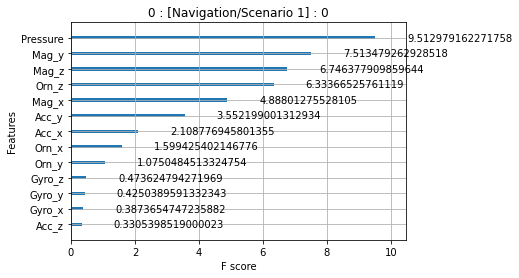

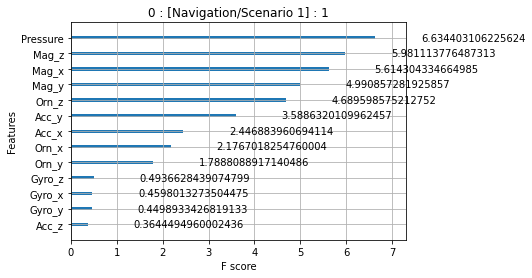

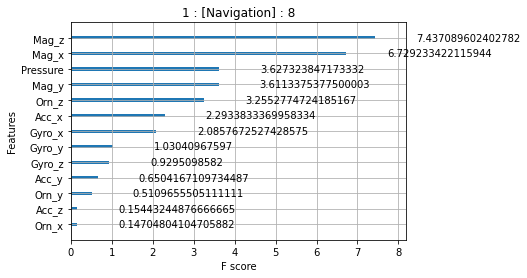

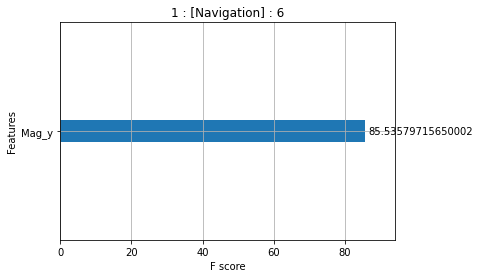

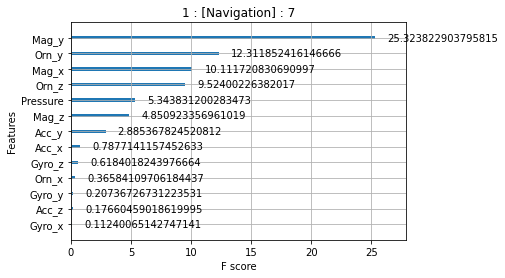

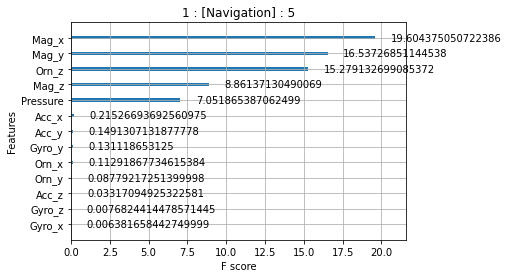

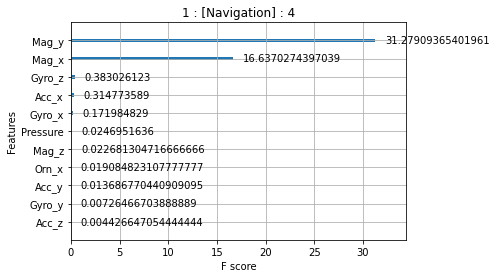

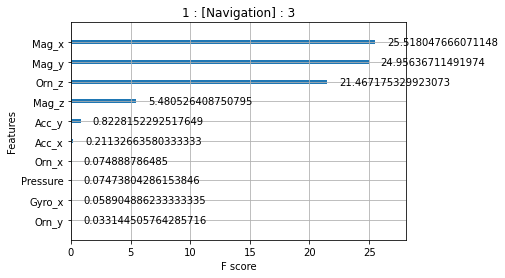

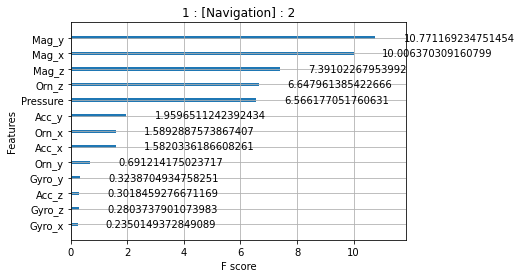

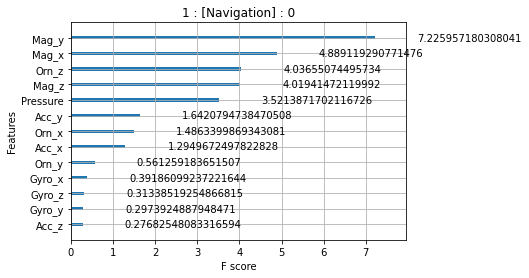

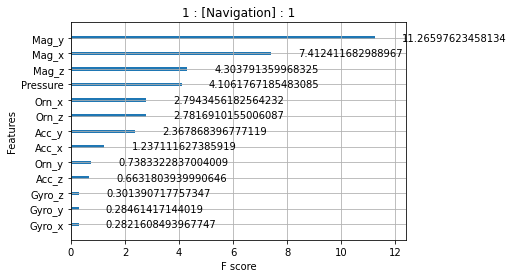

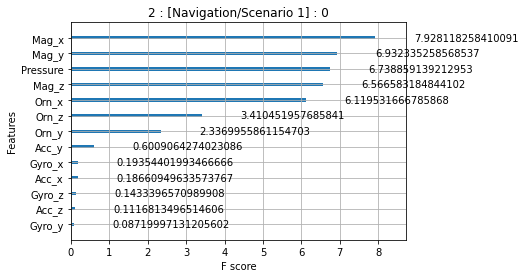

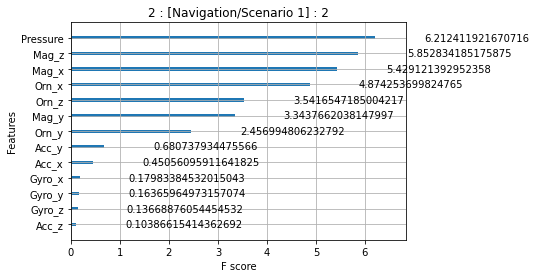

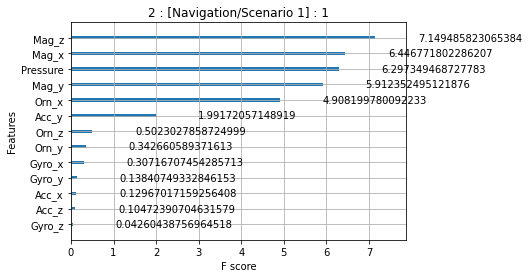

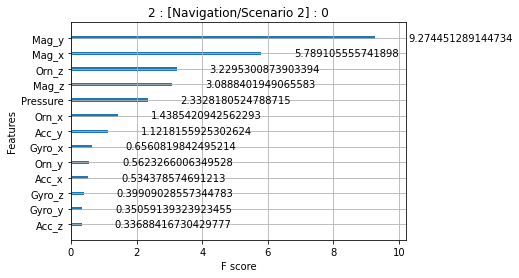

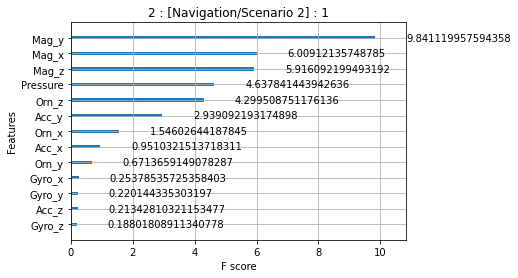

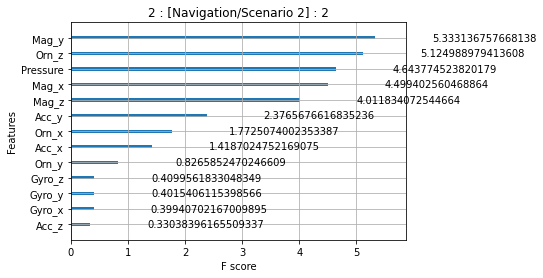

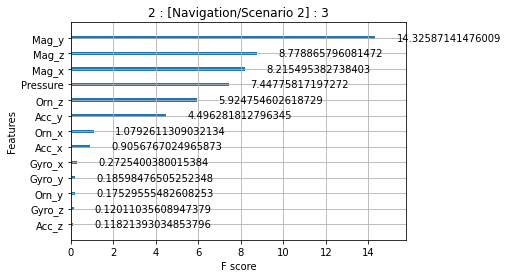

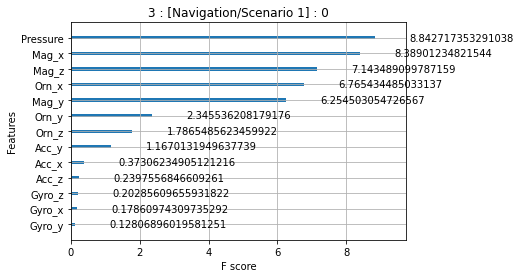

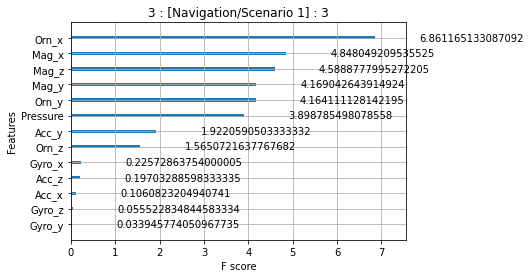

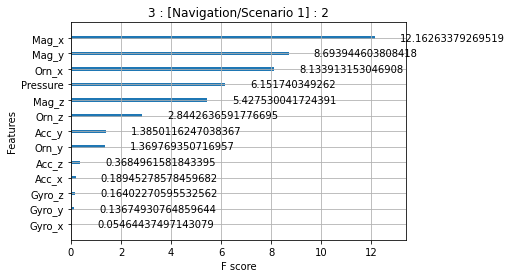

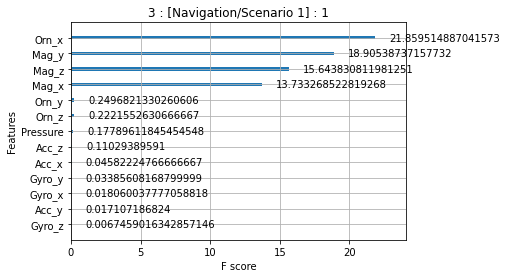

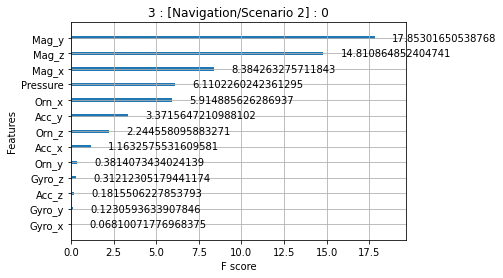

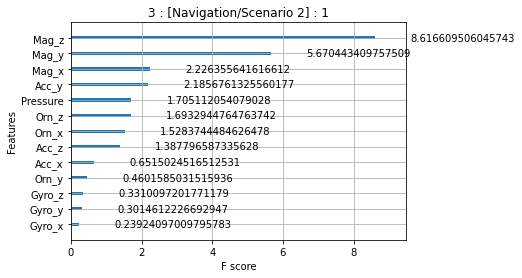

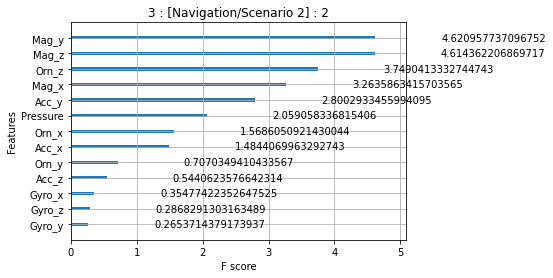

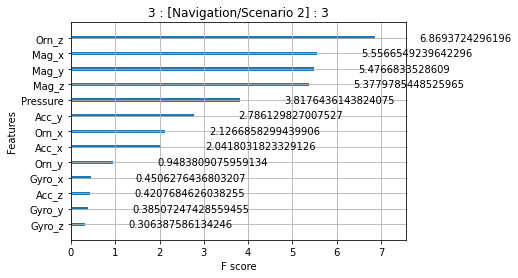

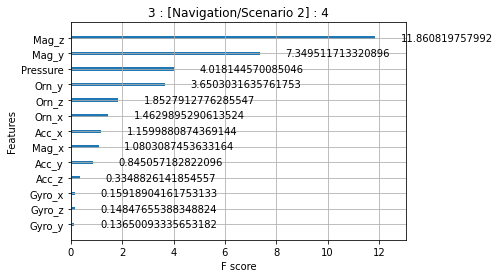

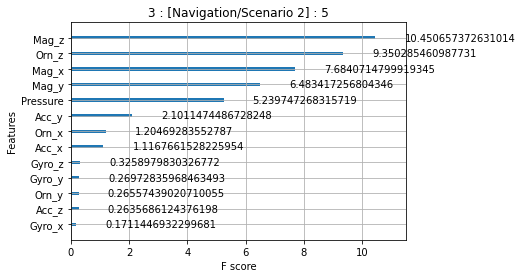

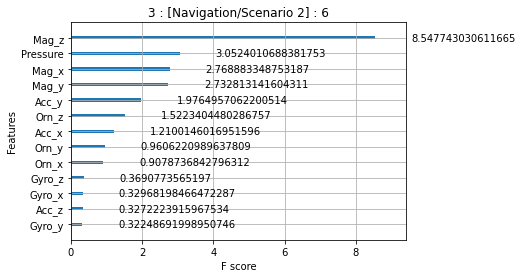

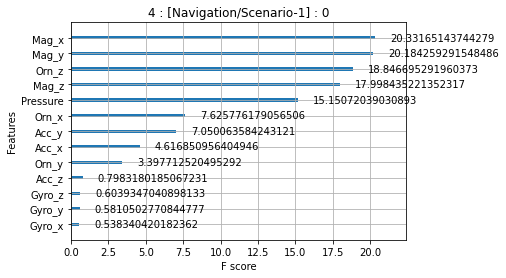

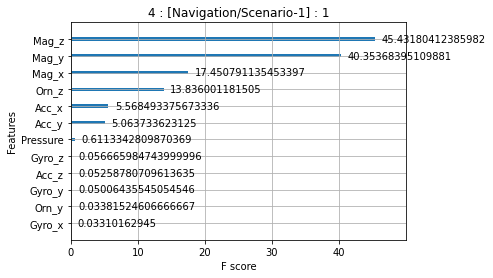

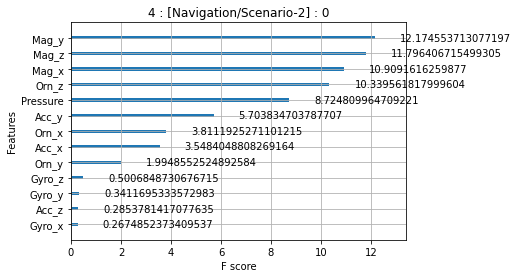

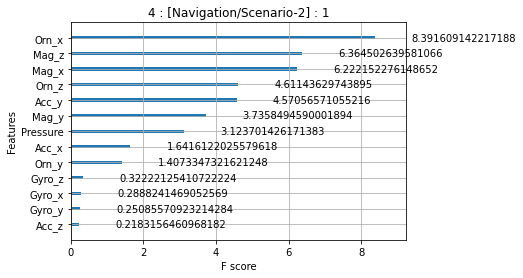

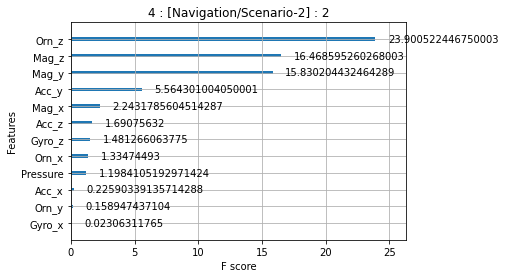

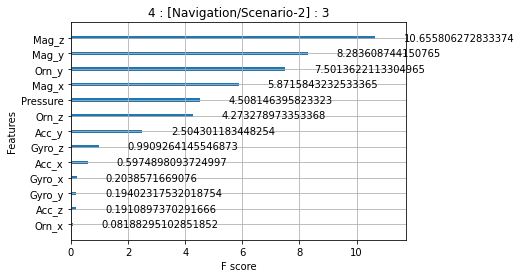

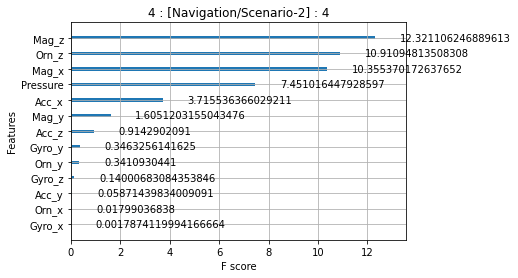

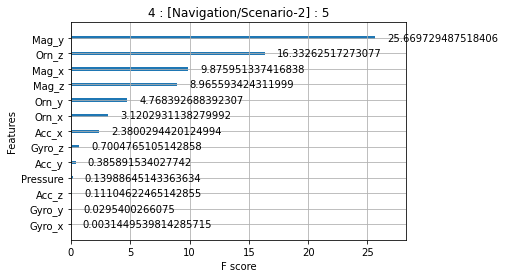

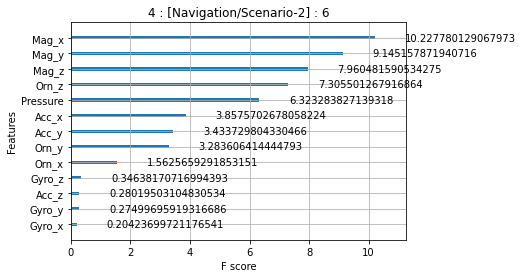

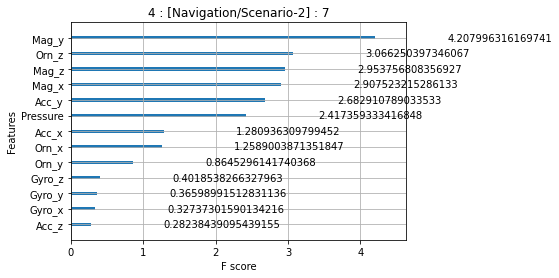

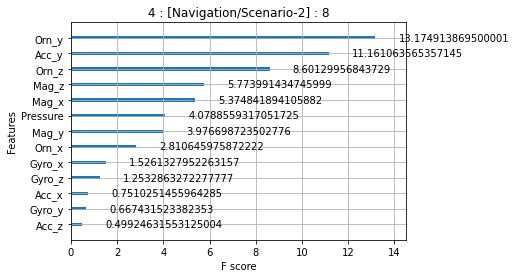

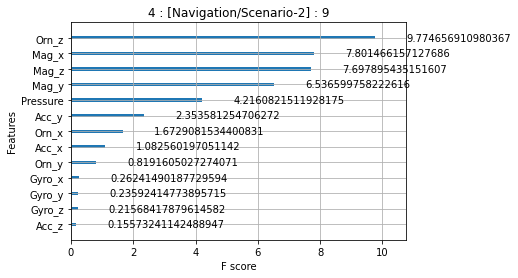

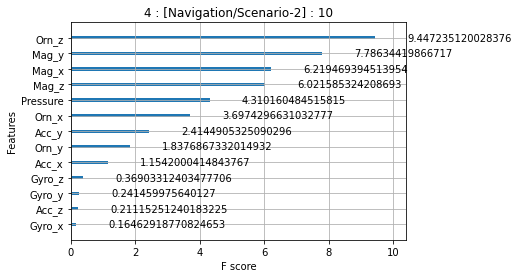

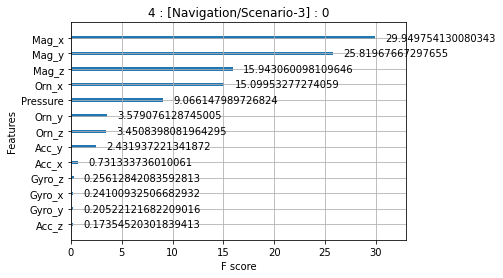

In [ ]:
#within corridor point wise classifications
reults_corridor_deep =[]
for file_no in range(0,len(csv_files)):
  df_big=pd.read_csv(csv_files[file_no])
  for _ in Scenarios[file_no]:
    df = df_big[df_big['meta_data'].str.contains(_)]
    td_traverse = find_traverse_path(df)
    td_corridor=corridor_finder(td_traverse)
    for corridor in td_corridor['corridor'].unique():
      td_corridorx = td_corridor[td_corridor['corridor']==corridor]
      X = td_corridorx[['Mag_x', 'Mag_y', 'Mag_z', 'Acc_x', 'Acc_y', 'Acc_z', 'Gyro_x', \
              'Gyro_y', 'Gyro_z', 'Orn_x', 'Orn_y', 'Orn_z', 'Pressure']]
      # X = td_corridorx[['Mag_x', 'Mag_y', 'Mag_z']]
      Y = td_corridorx[['X-cord','Y-cord']]
      Y['comb'] = Y['X-cord']*100 + Y['Y-cord']
      X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.33, random_state=42)
      reg1 = xgb.XGBClassifier(tree_method='gpu_hist',verbosity = 0)
      reg1.fit(X_train,y_train['comb'])
      xgb.plot_importance(reg1,importance_type='gain',title='{} : [{}] : {}'.format(file_no,_,str(int(corridor))))
      y_pred = reg1.predict(X_test)
      y_pred_x = y_pred//100
      y_pred_y = y_pred%100
      # trained_model = ml_output[1].save_model('xgb_{}_{}_{}.model'.format(file_no,_,str(int(corridor))))
      reults_corridor_deep.append((file_no, _, corridor, np.mean(((y_pred_x - y_test['comb'].values//100)**2 + (y_pred_y - y_test['comb'].values%100)**2)**(0.5)), (np.max(Y['X-cord'])-np.min(Y['X-cord'])), (np.max(Y['Y-cord'])-np.min(Y['Y-cord']))))
      # print(file_no, ele, corridor, np.mean(((y_pred_x - y_test['comb'].values//100)**2 + (y_pred_y - y_test['comb'].values%100)**2)**(0.5)), (np.max(Y['X-cord'])-np.min(Y['X-cord'])), (np.max(Y['Y-cord'])-np.min(Y['Y-cord'])))

In [ ]:
np.mean(np.array(reults_corridor_deep)[:,3].astype('float'))

0.09437761270940448

In [ ]:
#within corridor point wise classifications svm
reults_corridor_deep =[]
for file_no in range(0,len(csv_files)):
  df_big=pd.read_csv(csv_files[file_no])
  for _ in Scenarios[file_no]:
    df = df_big[df_big['meta_data'].str.contains(_)]
    td_traverse = find_traverse_path(df)
    td_corridor=corridor_finder(td_traverse)
    for corridor in td_corridor['corridor'].unique():
      td_corridorx = td_corridor[td_corridor['corridor']==corridor]
      td_corridorx = td_corridorx.dropna()
      X = td_corridorx[['Mag_x', 'Mag_y', 'Mag_z', 'Acc_x', 'Acc_y', 'Acc_z', 'Gyro_x', \
              'Gyro_y', 'Gyro_z', 'Orn_x', 'Orn_y', 'Orn_z', 'Pressure']]
      # X = td_corridorx[['Mag_x', 'Mag_y', 'Mag_z']]
      Y = td_corridorx[['X-cord','Y-cord']]
      Y['comb'] = Y['X-cord']*100 + Y['Y-cord']
      X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.33, random_state=42)
      reg1 = svm.SVC()
      reg1.fit(X_train,y_train['comb'])
      y_pred = reg1.predict(X_test)
      y_pred_x = y_pred//100
      y_pred_y = y_pred%100
      # trained_model = ml_output[1].save_model('xgb_{}_{}_{}.model'.format(file_no,_,str(int(corridor))))
      reults_corridor_deep.append((file_no, _, corridor, np.mean(((y_pred_x - y_test['comb'].values//100)**2 + (y_pred_y - y_test['comb'].values%100)**2)**(0.5)), (np.max(Y['X-cord'])-np.min(Y['X-cord'])), (np.max(Y['Y-cord'])-np.min(Y['Y-cord']))))
      # print(file_no, ele, corridor, np.mean(((y_pred_x - y_test['comb'].values//100)**2 + (y_pred_y - y_test['comb'].values%100)**2)**(0.5)), (np.max(Y['X-cord'])-np.min(Y['X-cord'])), (np.max(Y['Y-cord'])-np.min(Y['Y-cord'])))

In [ ]:
reults_corridor_deep =[]
for file_no in range(0,len(csv_files)):
    df_big=pd.read_csv(csv_files[file_no])
    for _ in Scenarios[file_no]:
        df = df_big[df_big['meta_data'].str.contains(_)]
        td_traverse = find_traverse_path(df)
        td_corridor=corridor_finder(td_traverse)
        for corridor in td_corridor['corridor'].unique():
            td_corridorx = td_corridor[td_corridor['corridor']==corridor]
            td_corridorx = td_corridorx.dropna()
            X = td_corridorx[['Mag_x', 'Mag_y', 'Mag_z', 'Acc_x', 'Acc_y', 'Acc_z', 'Gyro_x', \
                'Gyro_y', 'Gyro_z', 'Orn_x', 'Orn_y', 'Orn_z', 'Pressure']]
            # X = td_corridorx[['Mag_x', 'Mag_y', 'Mag_z']]
            Y = td_corridorx[['X-cord','Y-cord']]
            Y['comb'] = Y['X-cord']*100 + Y['Y-cord']
            le = preprocessing.LabelEncoder()
            le.fit(Y['comb'])
            le.classes_
            Y['cata'] = le.transform(Y['comb'])
            enc = OneHotEncoder(handle_unknown='ignore')
            enc.fit(Y['cata'].values.reshape(-1,1))
            Y_one = enc.transform(Y['cata'].values.reshape(-1,1)).toarray() 
            X=X.values.reshape(-1,13,1)
            X_train, X_test, y_train, y_test = train_test_split(X,Y_one, test_size=0.33, random_state=42)
            num_classes = Y_one.shape[1]
            input_shape = X.shape[1:]
            model = keras.Sequential(
            [
                keras.Input(shape=input_shape),
                layers.Conv1D(filters=64, kernel_size=3, activation="relu"),
                layers.Conv1D(filters=64, kernel_size=3, activation="relu"),
                layers.Conv1D(filters=64, kernel_size=3, activation="relu"),
                layers.Flatten(),
                layers.Dense(32, activation='relu'),
                layers.Dense(13, activation='relu'),
                layers.Dense(num_classes, activation="softmax"),
            ])
            epochs = 100
            model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
            model.fit(X_train, y_train, epochs=epochs, validation_split=0.1)

            pred_test= model.predict(X_test)
            y_pred = le.inverse_transform(enc.inverse_transform(pred_test)) #transform
            y_test_ = le.inverse_transform(enc.inverse_transform(y_test)) #transform
            y_pred_x = y_pred//100
            y_pred_y = y_pred%100
    # trained_model = ml_output[1].save_model('xgb_{}_{}_{}.model'.format(file_no,_,str(int(corridor))))
            reults_corridor_deep.append((file_no, _, corridor, np.mean(((y_pred_x - y_test_//100)**2 + (y_pred_y - y_test_%100)**2)**(0.5))))

Streaming output truncated to the last 5000 lines.
45/45 [==============================] - 1s 10ms/step - loss: 3.2227 - accuracy: 0.0842 - val_loss: 2.9077 - val_accuracy: 0.1210
Epoch 2/100
45/45 [==============================] - 0s 6ms/step - loss: 2.8002 - accuracy: 0.1246 - val_loss: 2.7943 - val_accuracy: 0.1401
Epoch 3/100
45/45 [==============================] - 0s 6ms/step - loss: 2.7057 - accuracy: 0.1323 - val_loss: 2.7164 - val_accuracy: 0.1847
Epoch 4/100
45/45 [==============================] - 0s 6ms/step - loss: 2.6105 - accuracy: 0.1621 - val_loss: 2.6289 - val_accuracy: 0.1847
Epoch 5/100
45/45 [==============================] - 0s 6ms/step - loss: 2.5438 - accuracy: 0.1599 - val_loss: 2.5421 - val_accuracy: 0.1911
Epoch 6/100
45/45 [==============================] - 0s 6ms/step - loss: 2.3728 - accuracy: 0.1904 - val_loss: 2.3628 - val_accuracy: 0.1847
Epoch 7/100
45/45 [==============================] - 0s 6ms/step - loss: 2.2391 - accuracy: 0.2201 - val_loss: 2.2

In [ ]:
np.mean(np.array(reults_corridor_deep)[:,3].astype('float'))